# <font color="maganta"><h3 align="center">Logistic Regression for Classification</h3></font> 

<h2 style = "color:brown" >Import Libraries</h2>

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

<h2 style = "color:brown" >Data Reading</h2>

In [2]:
df = pd.read_csv('Shoe data.csv')
df.head()

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


In [3]:
df.shape

(40, 2)

#### Rename columns name

In [4]:
df.rename(columns={'size(cm)':'size','class(y)':'class'},inplace = True)
df.head()

,size,class
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


#### Encoding Target variable

In [5]:
df['class'] = df['class'].replace(['Female','Male'],[0,1])
df.head(3)

,size,class
0,9.500,0
1,10.125,1
2,10.410,1


<h4 style = "color:brown" >Separate feature and target</h4>

In [6]:
x = df[['size']]
y = df['class']

<h1 style = "color:green">Implementing Logistic Regression Model</h1>

In [7]:
from sklearn.linear_model import LogisticRegression
logi_reg = LogisticRegression()
logi_reg.fit(x,y)

LogisticRegression()

In [8]:
logi_reg.coef_

array([[2.62699981]])

In [9]:
logi_reg.intercept_

array([-26.18198935])

In [10]:
pred_y = logi_reg.predict(x)
pred_y

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

#### Predicted class for shoe size 10cm

In [11]:
logi_reg.predict([[10]])

array([1], dtype=int64)

In [12]:
pred_prob = logi_reg.predict_proba(x)
pred_prob
#probability(female,male)

array([[0.77302845, 0.22697155],
       [0.39738242, 0.60261758],
       [0.2377457 , 0.7622543 ],
       [0.6013567 , 0.3986433 ],
       [0.05486986, 0.94513014],
       [0.8951951 , 0.1048049 ],
       [0.79524583, 0.20475417],
       [0.17003227, 0.82996773],
       [0.66235827, 0.33764173],
       [0.69665958, 0.30334042],
       [0.59504263, 0.40495737],
       [0.23301782, 0.76698218],
       [0.35729164, 0.64270836],
       [0.07737361, 0.92262639],
       [0.17757582, 0.82242418],
       [0.11860381, 0.88139619],
       [0.46492055, 0.53507945],
       [0.52395197, 0.47604803],
       [0.29398481, 0.70601519],
       [0.16274575, 0.83725425],
       [0.38176611, 0.61823389],
       [0.83473184, 0.16526816],
       [0.88221669, 0.11778331],
       [0.1392146 , 0.8607854 ],
       [0.71305157, 0.28694843],
       [0.21476669, 0.78523331],
       [0.2994667 , 0.7005333 ],
       [0.09833362, 0.90166638],
       [0.2192301 , 0.7807699 ],
       [0.11860381, 0.88139619],
       [0.

<h1 style = "color:green">Data Visualization of Logistic Regression</h1>

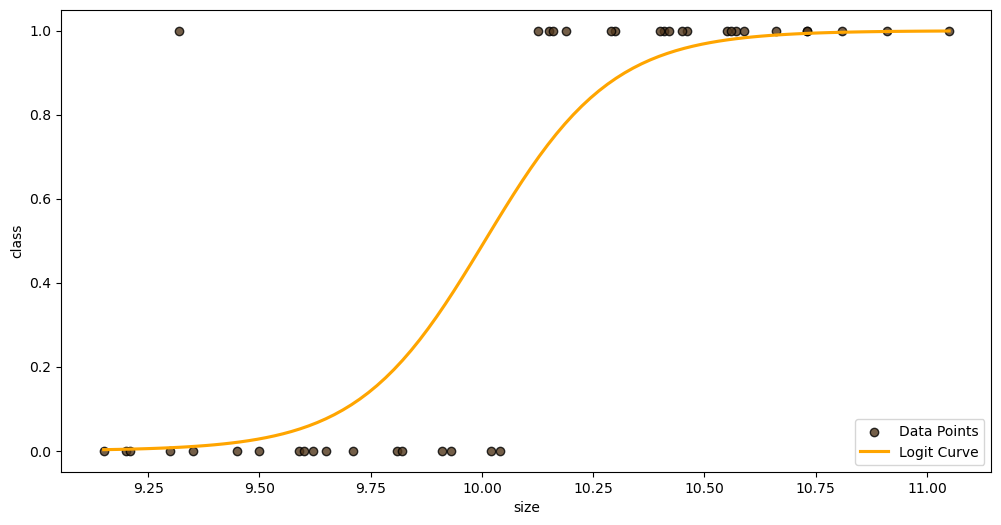

In [13]:
import seaborn as sns

#Logistic curve with seaborn
plt.figure(figsize = (12,6))
sns.regplot(x=x, y=y, data=df, logistic=True, ci=None, marker='o', 
            scatter_kws={'edgecolor': 'black','color': "#51371c"}, label = 'Data Points', 
            line_kws={'color': "orange",'label': 'Logit Curve'})

plt.legend()
plt.show()

In [14]:
import matplotlib.pyplot as plt

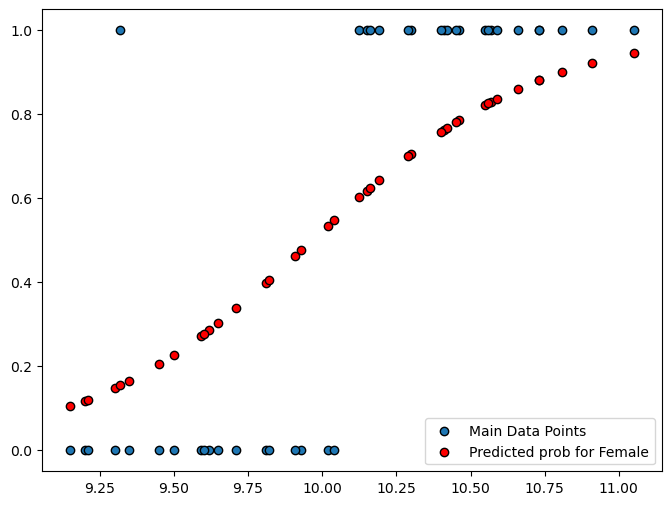

In [15]:
#actual with female proy curve
plt.figure(figsize=(8,6))
plt.scatter(x, y, marker='o', edgecolors='k', label='Main Data Points')

plt.scatter(x,pred_prob[:,1], edgecolors='k', color = "red",label = 'Predicted prob for Female')
plt.legend()

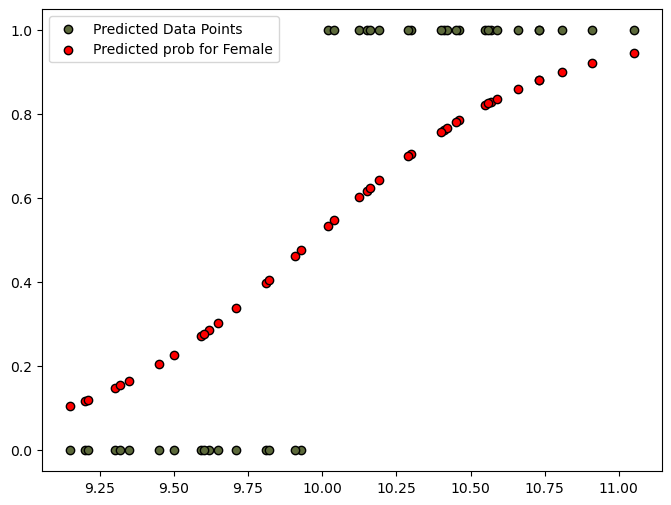

In [16]:
#predicted with female proy curve
plt.figure(figsize=(8,6))
plt.scatter(x, pred_y, color = "#5c693b", marker='o', edgecolors='k', label='Predicted Data Points')
plt.scatter(x,pred_prob[:,1], edgecolors='k', color = "red", label = 'Predicted prob for Female')
plt.legend()

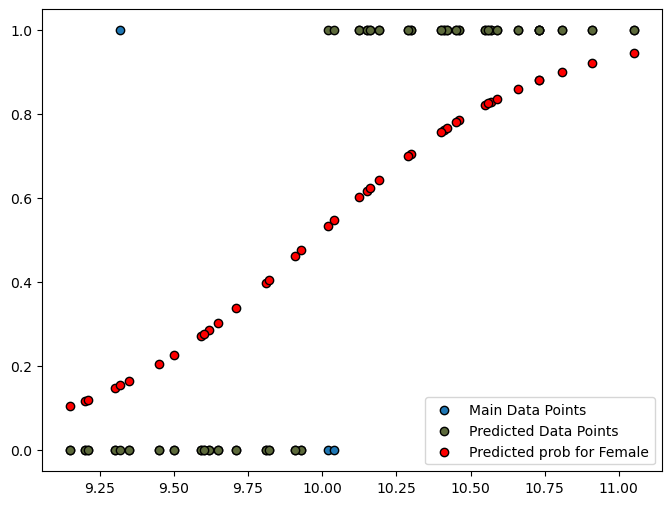

In [17]:
#actual vs predicted vs prob curve
plt.figure(figsize=(8,6))
plt.scatter(x, y, marker='o', edgecolors='k', label='Main Data Points')
plt.scatter(x, pred_y, color = "#5c693b", marker='o', edgecolors='k', label='Predicted Data Points')

plt.scatter(x,pred_prob[:,1], edgecolors='k', color = "red", label = 'Predicted prob for Female')
plt.legend()